In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [71]:
x = 6 * np.random.rand(100,1) - 3 #it generate random number 100 row and 1 column
y = 0.5*x**2 + 1.5*x + 2 + np.random.rand(100,1) # this is quardic equation ax^2 + bx + c
# np.random.rand(100,1) this is outliers

Text(0, 0.5, 'Y dataset')

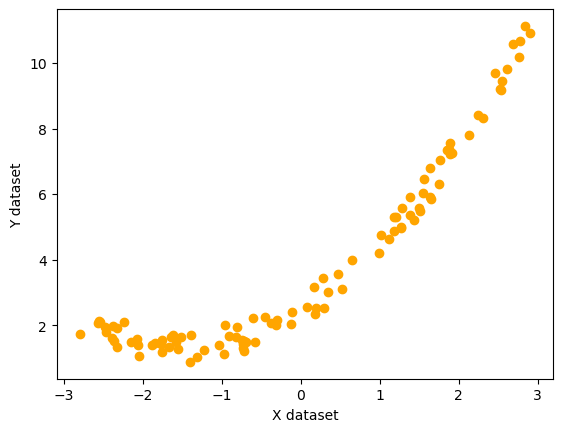

In [72]:
# plotting the datas
plt.scatter(x,y,color='orange')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
# this dataset doesn't have linear relation 

In [73]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
# implementing the linear regression 
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression() # create the linear regression object

In [76]:
regression_1.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
# let's evaluate the performace 
from sklearn.metrics import r2_score

In [78]:
score = r2_score(y_test,regression_1.predict(x_test))
score
# The R2 score will likely be low because the simple linear regression cannot capture the quadratic relationship in the data.

0.7000557402267111

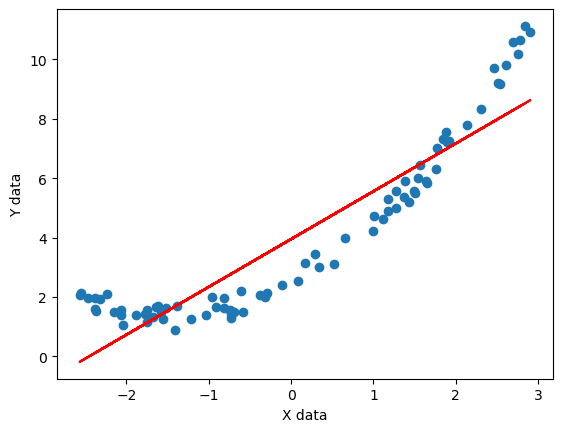

'\nregression_1.predict(x_train)\nthis method use to predict the outout on particular input \n '

In [79]:
# let's visulaize this model
plt.scatter(x_train,y_train)
plt.plot(x_train,regression_1.predict(x_train),color='red')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.show()
# this is the simple linear regresion on non-linear dataset 
"""
regression_1.predict(x_train)
this method use to predict the outout on particular input 
 """

## Polynomial Regression
Polynomial regression extends linear regression by adding polynomial features of the input variables.

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
poly = PolynomialFeatures(degree=2,include_bias=True)
"""
linear regression 
y = c + mx 

in polynomial regression
degree = 2 
y = c + mx + mx^2
include bias = True
y = c*x^0 + mx + mx^2
"""

'\nlinear regression \ny = c + mx \n\nin polynomial regression\ndegree = 2 \ny = c + mx + mx^2\ninclude bias = True\ny = c*x^0 + mx + mx^2\n'

In [ ]:
# fit_transform standardize the data mean= 0 nad std = 1
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [95]:
x_train_poly.shape

(80, 3)

In [96]:
# let predict the value 
regression = LinearRegression()

In [98]:
regression.fit(x_train_poly,y_train)
# fit means train the model on the given data.

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
y_predict = regression.predict(x_test_poly)

In [100]:
# check the r2 score
r2_score = r2_score(y_test,y_predict)
print(r2_score)

0.9827186278190583


initially the accuracy is 0.7000557402267111 after using the polynomial it gives 0.9827186278190583

In [ ]:
# let's see the coffiecent 
regression.coef_
# we are having the three feature

array([[0.        , 1.49170373, 0.50337558]])

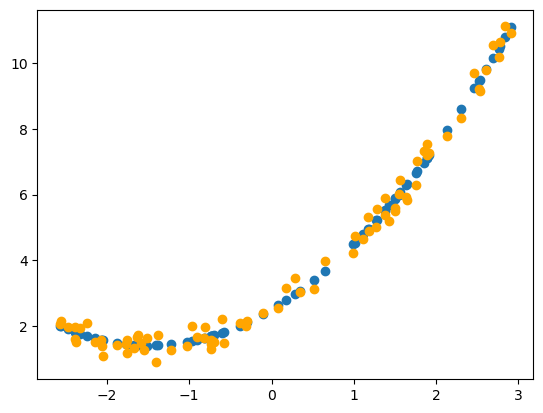

In [103]:
# let's visualize the data
# x_train  this is raw data or actual data 
predict_x_train = regression.predict(x_train_poly)

# this is the best fit line
plt.scatter(x_train,predict_x_train)
# initially it was
plt.scatter(x_train,y_train,color='orange')

In [108]:
# working on new data set 
data = 100 * np.random.rand(100,1)
new_data = poly.transform(data)

In [111]:
new_data

array([[1.00000000e+00, 2.28408705e+01, 5.21705366e+02],
       [1.00000000e+00, 1.60731925e+01, 2.58347517e+02],
       [1.00000000e+00, 8.58275406e+01, 7.36636672e+03],
       [1.00000000e+00, 3.27627093e+01, 1.07339512e+03],
       [1.00000000e+00, 6.26643624e+01, 3.92682232e+03],
       [1.00000000e+00, 3.53555452e+00, 1.25001457e+01],
       [1.00000000e+00, 1.02057699e+01, 1.04157739e+02],
       [1.00000000e+00, 8.11449394e+00, 6.58450119e+01],
       [1.00000000e+00, 7.69058528e+01, 5.91451020e+03],
       [1.00000000e+00, 4.83253213e+01, 2.33533668e+03],
       [1.00000000e+00, 8.29910604e+01, 6.88751610e+03],
       [1.00000000e+00, 8.89180933e+01, 7.90642731e+03],
       [1.00000000e+00, 9.88124274e+01, 9.76389581e+03],
       [1.00000000e+00, 4.77313457e+00, 2.27828136e+01],
       [1.00000000e+00, 5.30083271e+01, 2.80988274e+03],
       [1.00000000e+00, 2.67772348e+01, 7.17020304e+02],
       [1.00000000e+00, 7.50326887e+01, 5.62990438e+03],
       [1.00000000e+00, 6.70333

In [114]:
predict_data = regression.predict(new_data)

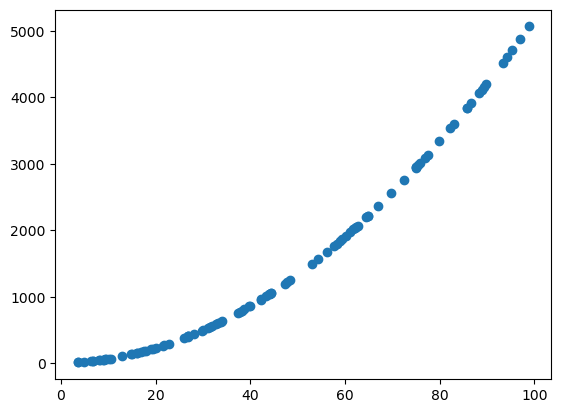

In [116]:
# visualize the data
plt.scatter(data,predict_data)